In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB


In [5]:
train_data=train_data.dropna()

In [11]:
train_data.info()
#train_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
x    699 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 16.4 KB


In [12]:
test_data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


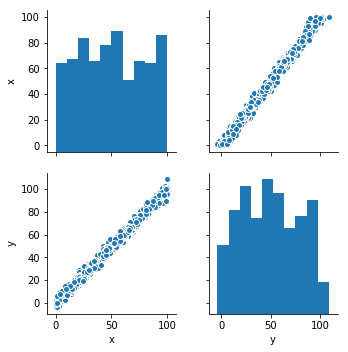

In [13]:
sns.pairplot(train_data)

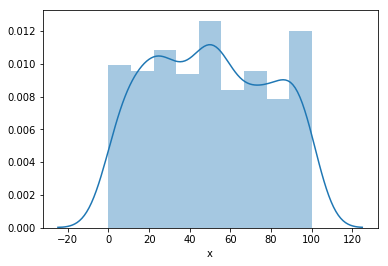

In [14]:
sns.distplot(train_data['x'])

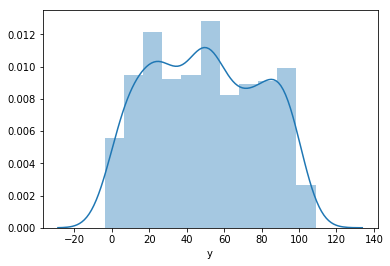

In [15]:
sns.distplot(train_data['y'])

In [16]:
train_X = train_data['x'].values
train_y = train_data['y'].values
test_X = test_data['x'].values
test_y = test_data['y'].values

In [18]:
# lets check the skewness
print ("Mean of X Training set: ", np.mean(train_X), "\n")
print ("Median of X Training set: ", np.median(train_X), "\n")
print ("Mean of Y Training set: ", np.mean(train_y), "\n")
print ("Median of Y Training set: ", np.median(train_y), "\n")
print ("Std Dev of X Training set: ", np.std(train_X), "\n")
print ("Std Dev of Y Training set: ", np.std(train_y), "\n")

Mean of X Training set:  50.01430615164521 

Median of X Training set:  49.0 

Mean of Y Training set:  49.939869170457804 

Median of Y Training set:  48.97302037 

Std Dev of X Training set:  28.933841385275375 

Std Dev of Y Training set:  29.08838760426971 



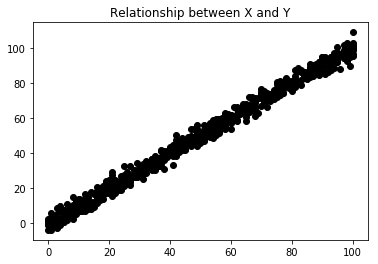

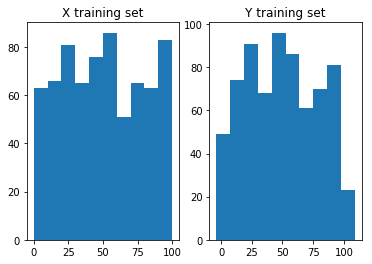

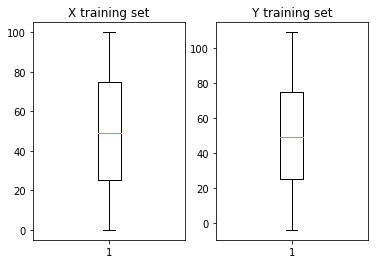

In [27]:
# So let's plot some of the data 
# - this gives some core routines to experiment with different parameters
plt.title('Relationship between X and Y')
plt.scatter(train_X, train_y,  color='black')
plt.show()

# Use subplot to have graphs side by side
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.hist(train_X)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.hist(train_y)
plt.show()

plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(train_X)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(train_y)
plt.show()

In [19]:
# doing the regression line
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [32]:
train_X = np.array(train_X).reshape(-1,1)

In [36]:
train_y = np.array(train_y).reshape(-1,1)


In [37]:
lm.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
test_X = np.array(test_X).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)

In [40]:
y_prediction = lm.predict(test_X)

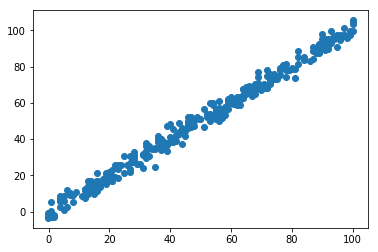

In [42]:
plt.scatter(y_prediction,test_y)

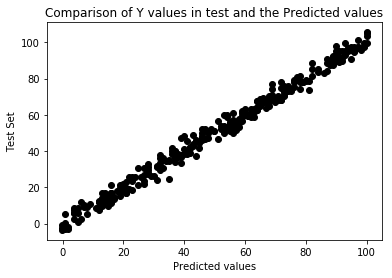

In [44]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_prediction,test_y,  color='black')
plt.show()

In [47]:
# This the F-statistic that shows whether there is a relationship between the response and the predictors
# I couldn't find a function for this so I have done the calcs by hand
# First get the total sum of the squares.
TSS = train_y
TSS = [i**2 for i in TSS]   # Using list comprehension to square each element
TSS = np.sum(TSS)
print(TSS)

2334747.2534988923


In [48]:
# This calculates the residual sum of the squares
y_prediction = lm.predict(train_X)   # These are predicted values of Y
y_variance = train_y - y_prediction # These are the residuals bewteen actual values of Y and the predcitions
y_variance = [i**2 for i in y_variance]   # Using list comprehension to square each element
RSS = np.sum(y_variance)
print(RSS)

5499.559160707891


In [49]:
# As we only have one feature the f-statistic formula = ((TSS -RSS)/p)/(RSS/(n - p -1)) becomes
#(TSS - RSS)/(RSS/ (n - 2) )
Fstatistic = (TSS - RSS) / (RSS/(np.size(y_prediction) - 2))
print ("The F-statistic is:  ", Fstatistic)

The F-statistic is:   295202.8690868275


In [50]:
print(lm.coef_)

[[1.00065638]]


In [51]:
print(lm.intercept_)

[-0.10726546]


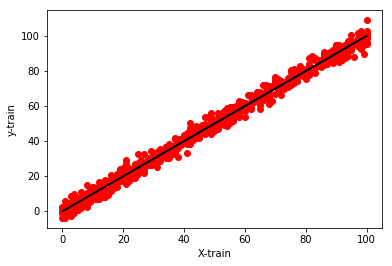

In [55]:

# Visualising the Training set resultsplt.title('plotting the linear regression over test data')
plt.scatter(train_X,train_y,color='red')
plt.xlabel('X-train')
plt.ylabel('y-train')
plt.plot(train_X,lm.predict(train_X),color='black')


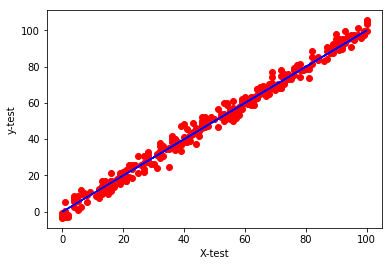

In [56]:
# Visualising the Training set resultsplt.title('plotting the linear regression over test data')
plt.scatter(test_X,test_y,color='red')
plt.xlabel('X-test')
plt.ylabel('y-test')
plt.plot(train_X,lm.predict(train_X),color='blue')